<h1> Sign Language Neural Network </h1>
<p>by Robert Kulesza</p>

## Dataset
* Sign Language MNIST dataset
* https://www.kaggle.com/datamunge/sign-language-mnist#sign_mnist_test.zip

## Methods
* <b>Preprocessing</b>
    * batch processing
* <b>Machine Learning Techniques</b>
    * Neural Network
* <b>Results</b>
    * loss
    * accuracy

### import libraries

In [94]:
import tensorflow as tf
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from tensorflow.python.framework import ops

### Load Data

* paths for training and testing data.
* list of csv files in the training / testing directories.
* separated data and labels
* reshaped data to 28*28

In [95]:
path_train = "sign_mnist_train"
path_test = "sign_mnist_test"

In [96]:
csv_train = os.listdir(path_train)
csv_test = os.listdir(path_test)

csv_train = [path_train + "/" + csv_train[x] for x in range(len(csv_train))]
csv_test = [path_test + "/" + csv_test[x] for x in range(len(csv_train))]

In [97]:
df_train = pd.read_csv(csv_train[0])
df_test = pd.read_csv(csv_test[0])

array_train_X = np.array(df_train.drop("label",1))
array_train_y = np.array(df_train['label'])

array_test_X = np.array(df_test.drop("label",1))
array_test_y = np.array(df_test['label'])

In [98]:
array_train_X = array_train_X.reshape(len(array_train_X),28,28)
array_test_X = array_test_X.reshape(len(array_test_X),28,28)

### print example image and label

label:  3
AxesImage(54,36;334.8x217.44)


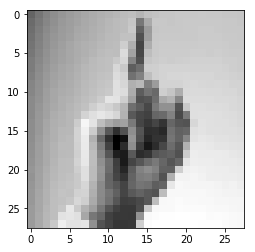

In [100]:
img = array_train_X[0]
lbl = array_train_y[0]

print("label: ",lbl)
print(plt.imshow(img, cmap='gray'))

### The Neural Network
* Reference: https://www.kaggle.com/meditech101/chess-fen-generator-improved

In [101]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D


In [252]:
tf.reset_default_graph()

In [253]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(26, kernel_initializer='he_normal'))
model.compile(
  loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000022890A9C320>>
Traceback (most recent call last):
  File "c:\users\kules\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "c:\users\kules\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 2374492749896
Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000022890F48EB8>>
Traceback (most recent call last):
  File "c:\users\kules\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del_

In [254]:
labels='abcdefghijklmnopqrstuvwxyz'

### Visualize Neural Network

In [255]:
from keras.utils.vis_utils import plot_model

In [256]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train Model

In [257]:
array_train_X = array_train_X.reshape(len(array_train_X),28,28,1)

In [258]:
array_train_X[:1000].shape

(1000, 28, 28, 1)

In [259]:
#must iterate forever (forced to stop by tf.keras)
#use randomizer to pick index?
def iterate_data(X,y,batch_size=100):
    for x in range(1,len(X) // batch_size + 2):
        if x*batch_size < len(X):
            yield X[(x-1)*batch_size:x*batch_size], y[(x-1)*batch_size:x*batch_size]
        else:
            yield X[(x-1)*batch_size:len(X)], y[(x-1)*batch_size:len(X)]

In [260]:
for x,y in iterate_data(array_train_X, array_train_y):
    print(x.shape," ",y.shape)

(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28, 1)   (100,)
(100, 28, 28

In [261]:
EPOCHS = 2
BATCH_SIZE = 100
STEPS = len(array_train_X) // BATCH_SIZE

model.fit_generator(iterate_data(array_train_X,array_train_y,BATCH_SIZE),steps_per_epoch=STEPS, epochs=EPOCHS)

Epoch 1/2


InvalidArgumentError: Tensor dense_2_target:0, specified in either feed_devices or fetch_devices was not found in the Graph

### Test Model